# Smart Traffic Light Control System

**Intro to AI | MENG-3065-0NB**

**Version:** 0.1.0 



**Authors:** Vaibhav Taylor & Yash Kant

**Last Updated:** 2025-11-24  

## Objective
Reduce traffic congestion using AI-based vehicle detection and dynamic signal timing.

## Sections
1. Setup & Imports
2. Load Sample Images / Video
3. Vehicle Detection (OpenCV + Pretrained Model)
4. Traffic Analysis & Queue Estimation
5. Dynamic Signal Timing Algorithm
6. Simulation & Results
7. Changelog

In [1]:
# !pip install opencv-python
# !pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
# !pip install ultralytics

In [2]:
# ============================================
# Import Required Libraries
# ============================================

import os
import time
import numpy as np              # Numerical operations
import pandas as pd             # Data handling
import random
from IPython.display import clear_output

# --- Image Processing ---
import cv2                      # OpenCV for image/video processing
from PIL import Image           # Pillow for image loading and manipulation

# --- Visualization ---
import matplotlib.pyplot as plt # Plotting graphs and images

# --- Machine Learning / AI ---
import torch                    # Deep learning backend (required by YOLO)
from torchvision import transforms  # Useful for preprocessing if needed

# --- Utility Tools ---
from datetime import datetime

# --- YOLOv8 Object Detection ---
from ultralytics import YOLO

# Load YOLOv8n (nano) model — fast and lightweight
model = YOLO('yolov8n.pt')

print('Imports Successful')

Imports Successful


Text(0.5, 1.0, 'Traffic Image')

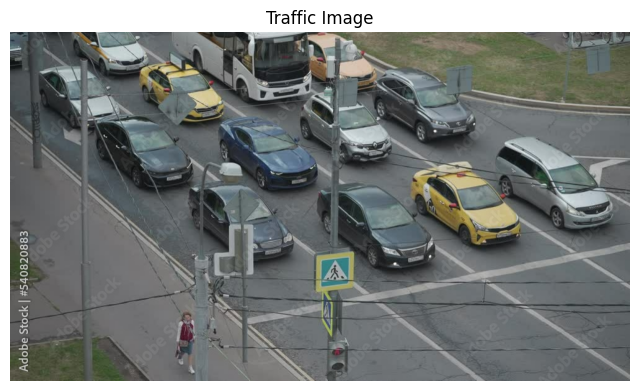

In [3]:

# Load a sample traffic image from the specified file path
image_path = "traffic1.jpg"
img = cv2.imread(image_path)  # Reads the image in BGR format (default for OpenCV)

# Convert the image from BGR to RGB for correct color display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(8, 6))      # Set the figure size for better visibility
plt.imshow(img_rgb)             # Show the image in RGB color space
plt.axis('OFF')                 # Hide axis ticks and labels for a cleaner view
plt.title("Traffic Image")      # Add a title to the displayed image



0: 736x1280 1 person, 15 cars, 1 bus, 146.6ms
Speed: 28.5ms preprocess, 146.6ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)
Detected objects: 17


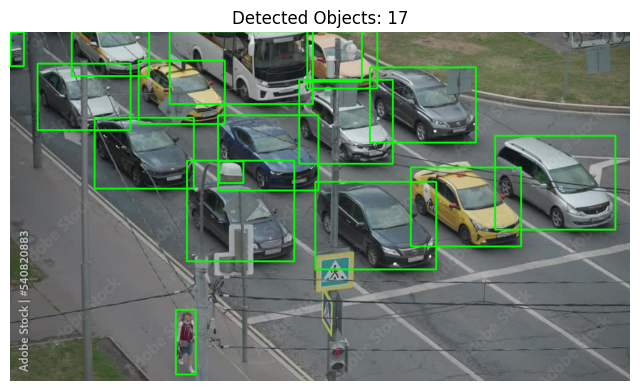

In [4]:

# Run YOLO object detection on the input image
results = model(img, imgsz=1280, conf=0.10)  # imgsz sets input size, conf sets confidence threshold

# Count all detected objects (no class filtering applied)
vehicle_count = len(results[0].boxes)

# Print the total number of detected objects
print(f"Detected objects: {vehicle_count}")

# Draw bounding boxes on a copy of the original image (without labels or confidence scores)
img_copy = img.copy()
for box in results[0].boxes.xyxy:  # xyxy gives [x1, y1, x2, y2] coordinates
    x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers for OpenCV
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green rectangle

# Convert the image with bounding boxes from BGR to RGB for Matplotlib display
img_with_boxes_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Display the processed image inline using Matplotlib
plt.figure(figsize=(8, 6))                 # Set figure size
plt.imshow(img_with_boxes_rgb)            # Show image with bounding boxes
plt.axis('off')                            # Hide axis for cleaner visualization
plt.title(f"Detected Objects: {vehicle_count}")  # Add title showing count
plt.show()                                 # Render the image


In [5]:

def get_lane_count():
    """
    Placeholder function for lane detection.
    Currently uses a fixed value for testing but can switch to user input or random generation.
    
    Returns:
        int: Number of lanes detected or simulated.
    """
    try:
        # Option 1: Use a fixed placeholder value (currently set to 8)
        lane_count = 8  # Replace with: int(input("Enter the number of lanes: ")) for manual input

        # Option 2: Simulate lane count randomly between 1 and 4 (uncomment for testing)
        # lane_count = random.randint(1, 5)

        print(f"Lane count set to: {lane_count}")
        return lane_count

    except ValueError:
        # Handle invalid input gracefully by defaulting to 3 lanes
        print("Invalid input. Defaulting to 3 lanes.")
        return 3

# Example usage of the placeholder function
lanes = get_lane_count()
print(f"Detected lanes: {lanes}")


Lane count set to: 8
Detected lanes: 8


In [6]:

def calculate_green_time(total_vehicles, lanes, base_time=10, max_time=60):
    """
    Calculate the green light duration based on traffic load and lane count.
    
    Args:
        total_vehicles (int): Total number of detected vehicles.
        lanes (int): Number of lanes available.
        base_time (int): Minimum green light duration in seconds (default: 10).
        max_time (int): Maximum green light duration in seconds (default: 60).
    
    Returns:
        int: Calculated green light duration in seconds, capped at max_time.
    """
    # Compute vehicles per lane to estimate traffic density
    vehicles_per_lane = total_vehicles / lanes
    
    # Scale green time proportionally based on vehicles per lane
    # Assumes 20 vehicles per lane as the upper bound for scaling
    scaled_time = base_time + (vehicles_per_lane / 20) * (max_time - base_time)
    
    # Ensure the green time does not exceed the maximum allowed
    return min(max_time, int(scaled_time))

# Example usage: Calculate green light time for 17 vehicles across 3 lanes
total_vehicles = vehicle_count
green_light_time = calculate_green_time(total_vehicles, lanes)

print(f"Green Light Duration: {green_light_time} s")


Green Light Duration: 15 s


In [7]:

# Emoji-based traffic light display
def show_two_lights(signal_a, signal_b):
    colors = {'green': '🟢', 'yellow': '🟡', 'red': '🔴'}
    print(f"[Signal A: {colors[signal_a]}] | [Signal B: {colors[signal_b]}]")

# Example dynamic timings (replace with your calculated values)
green_time_A = green_light_time
yellow_time_A = 3
green_time_B = 5
yellow_time_B = 3
both_red_time = 3

# Simulation loop
for cycle in range(2):
    clear_output(wait=True)
    show_two_lights('green', 'red')
    print(f"Signal A: Green ({green_time_A}s), Signal B: Red")
    time.sleep(green_time_A)

    clear_output(wait=True)
    show_two_lights('yellow', 'red')
    print(f"Signal A: Yellow ({yellow_time_A}s), Signal B: Red")
    time.sleep(yellow_time_A)

    clear_output(wait=True)
    show_two_lights('red', 'red')
    print(f"Both Signals: Red ({both_red_time}s)")
    time.sleep(both_red_time)

    clear_output(wait=True)
    show_two_lights('red', 'green')
    print(f"Signal A: Red, Signal B: Green ({green_time_B}s)")
    time.sleep(green_time_B)

    clear_output(wait=True)
    show_two_lights('red', 'yellow')
    print(f"Signal A: Red, Signal B: Yellow ({yellow_time_B}s)")
    time.sleep(yellow_time_B)

    clear_output(wait=True)
    show_two_lights('red', 'red')
    print(f"Both Signals: Red ({both_red_time}s)")
    time.sleep(both_red_time)

print("End of Simulation")

[Signal A: 🔴] | [Signal B: 🔴]
Both Signals: Red (3s)
End of Simulation


=== Average Waiting Time Reduction ===
Vehicles: 15
Static Avg Wait: 60s
Dynamic Avg Wait: 36s
Wait Time Reduced: 24s



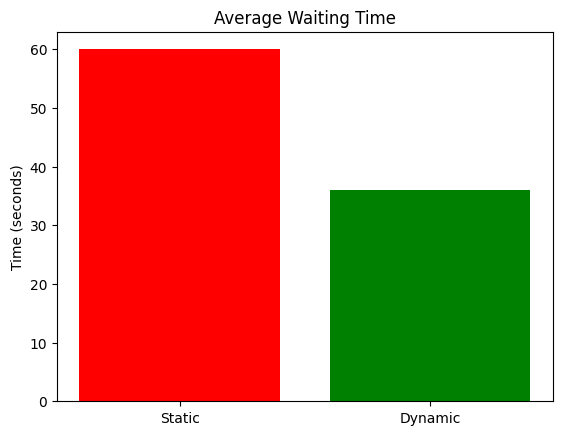

In [8]:

def calculate_wait_time_reduction(static_green_time, dynamic_green_time, vehicle_count):
    """
    Compare static vs. dynamic green light timing and calculate average waiting time reduction.
    
    Args:
        static_green_time (int): Fixed green light duration in seconds.
        dynamic_green_time (int): Adaptive green light duration in seconds.
        vehicle_count (int): Number of vehicles considered in the calculation.
    
    Prints:
        A summary of static and dynamic average wait times and the reduction achieved.
    Displays:
        A bar chart comparing static vs. dynamic waiting times.
    """
    # Calculate average waiting times for static and dynamic signals
    static_wait = static_green_time * 2   # Assuming two cycles for average wait
    dynamic_wait = dynamic_green_time * 2
    wait_reduction = static_wait - dynamic_wait

    # Print comparison results
    print("=== Average Waiting Time Reduction ===")
    print(f"Vehicles: {vehicle_count}")
    print(f"Static Avg Wait: {static_wait}s")
    print(f"Dynamic Avg Wait: {dynamic_wait}s")
    print(f"Wait Time Reduced: {wait_reduction}s\n")

    # Visualize comparison using a bar chart
    plt.bar(['Static', 'Dynamic'], [static_wait, dynamic_wait], color=['red', 'green'])
    plt.title('Average Waiting Time')
    plt.ylabel('Time (seconds)')
    plt.show()

# Example usage:
calculate_wait_time_reduction(static_green_time=30, dynamic_green_time=18, vehicle_count=15)


=== CO₂ Emission Comparison ===
Static CO₂ Emission: 0.36 kg
Dynamic CO₂ Emission: 0.216 kg
Saved: 0.144 kg
Percentage Reduction: 40.0%


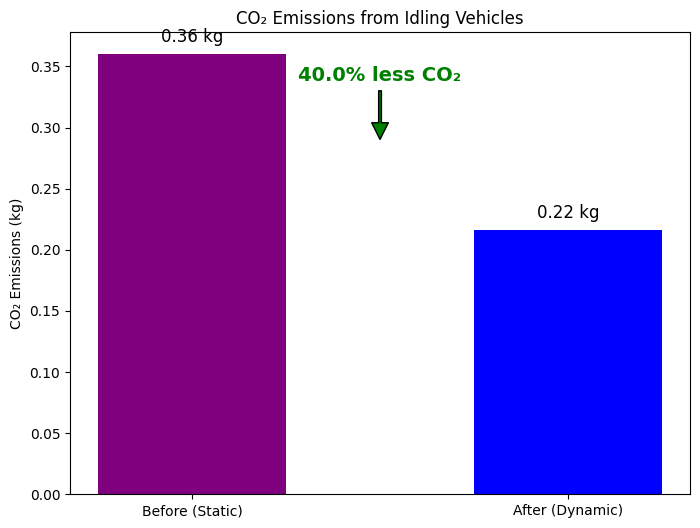

In [9]:

def calculate_co2_emissions(wait_time_sec, vehicle_counts, emission_factors=None):
    """
    Calculate CO₂ emissions during idling based on vehicle types.
    
    Args:
        wait_time_sec (int): Total wait time in seconds.
        vehicle_counts (dict): Dictionary of vehicle types and their counts 
                               (e.g., {'car': 15, 'bus': 1}).
        emission_factors (dict): CO₂ emission factors in kg per minute per vehicle type.
                                 Defaults: {'car': 0.02, 'bus': 0.06, 'truck': 0.08}.
    
    Returns:
        float: Total CO₂ emissions in kilograms, rounded to 3 decimal places.
    """
    # Use default emission factors if none provided
    if emission_factors is None:
        emission_factors = {
            'car': 0.02,    # kg/min
            'bus': 0.06,    # kg/min
            'truck': 0.08   # kg/min
        }

    # Convert wait time from seconds to minutes
    wait_time_min = wait_time_sec / 60
    total_emission = 0

    # Calculate emissions for each vehicle type
    for v_type, count in vehicle_counts.items():
        factor = emission_factors.get(v_type, 0.02)  # Default to car if type unknown
        total_emission += wait_time_min * count * factor

    return round(total_emission, 3)

# Example usage:
vehicle_counts = {'car': 15, 'bus': 1}
static_emission = calculate_co2_emissions(wait_time_sec=60, vehicle_counts=vehicle_counts)
dynamic_emission = calculate_co2_emissions(wait_time_sec=36, vehicle_counts=vehicle_counts)

# Calculate percentage reduction in emissions
percentage_reduction = ((static_emission - dynamic_emission) / static_emission) * 100

# Print summary of results
print("=== CO₂ Emission Comparison ===")
print(f"Static CO₂ Emission: {static_emission} kg")
print(f"Dynamic CO₂ Emission: {dynamic_emission} kg")
print(f"Saved: {static_emission - dynamic_emission} kg")
print(f"Percentage Reduction: {percentage_reduction:.1f}%")

# Visualization: Bar chart comparing static vs dynamic emissions
labels = ['Before (Static)', 'After (Dynamic)']
emissions = [static_emission, dynamic_emission]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, emissions, color=['purple', 'blue'], width=0.5)
plt.title('CO₂ Emissions from Idling Vehicles')
plt.ylabel('CO₂ Emissions (kg)')

# Add emission values on top of bars
for bar, value in zip(bars, emissions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{value:.2f} kg", ha='center', fontsize=12)

# Annotate percentage reduction with an arrow
plt.annotate(f"{percentage_reduction:.1f}% less CO₂",
             xy=(0.5, (static_emission + dynamic_emission)/2),
             xytext=(0.5, (static_emission + dynamic_emission)/2 + 0.05),
             ha='center', fontsize=14, color='green', fontweight='bold',
             arrowprops=dict(facecolor='green', shrink=0.05, width=2))

plt.show()  # Display the plot


=== Throughput Gain ===
Vehicles: 15
Static Throughput: 0.500 veh/sec
Dynamic Throughput: 0.833 veh/sec
Throughput Gain: 66.67%



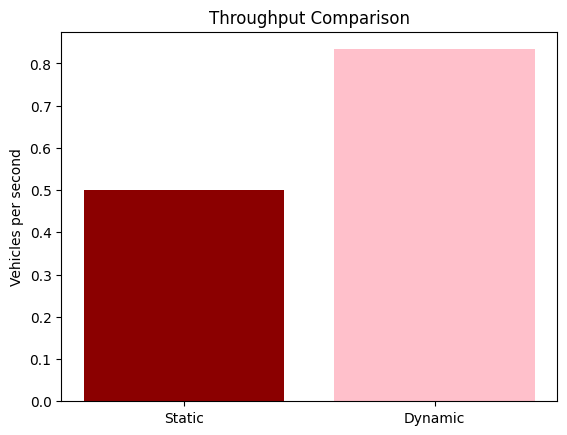

In [10]:

def calculate_throughput_gain(static_green_time, dynamic_green_time, vehicle_count):
    """
    Calculate throughput gain when switching from static to dynamic green light timing.
    
    Args:
        static_green_time (int): Fixed green light duration in seconds.
        dynamic_green_time (int): Adaptive green light duration in seconds.
        vehicle_count (int): Number of vehicles considered in the calculation.
    
    Prints:
        Comparison of static vs. dynamic throughput and percentage gain.
    Displays:
        A bar chart comparing throughput values.
    """
    # Calculate throughput (vehicles per second) for static and dynamic signals
    static_throughput = vehicle_count / static_green_time
    dynamic_throughput = vehicle_count / dynamic_green_time

    # Compute percentage gain in throughput
    throughput_gain = ((dynamic_throughput - static_throughput) / static_throughput) * 100

    # Print comparison results
    print("=== Throughput Gain ===")
    print(f"Vehicles: {vehicle_count}")
    print(f"Static Throughput: {static_throughput:.3f} veh/sec")
    print(f"Dynamic Throughput: {dynamic_throughput:.3f} veh/sec")
    print(f"Throughput Gain: {throughput_gain:.2f}%\n")

    # Visualize comparison using a bar chart
    plt.bar(['Static', 'Dynamic'], [static_throughput, dynamic_throughput], color=['darkred', 'pink'])
    plt.title('Throughput Comparison')
    plt.ylabel('Vehicles per second')
    plt.show()

# Example usage:
calculate_throughput_gain(static_green_time=30, dynamic_green_time=18, vehicle_count=15)


In [11]:
print('End of Program')

End of Program


## Changelog
- 0.1.0 (2025-11-12): Initial setup, basic image detection.
- 0.2.0 (2025-11-13): Added YOLO model, and tested trainer images.
- 0.3.0 (2025-11-15): Increased Image Resolution, Lowered Confidence Score
- 0.4.0 (2025-11-16): Added Traffic Light Simulation, Uses Calculated Green Time
- 0.5.0 (2025-11-17): Created Lane Count Placeholder, Uses Rand Int # of Lanes
- 0.6.0 (2025-11-18): Updated Traffic Light Simulation, Two Directions of Traffic
- 0.7.0 (2025-11-19): Added Performance Metrics, CO2 Emissions, Throughout Difference, Wait Time Difference
- 0.7.1 (2025-11-19): Added Plots for Performance Metrics
- 0.8.0 (2025-11-22): Optimizated and Cleaned Up Code
- 0.9.0 (2025-11-23): Tested more image sets
- 1.0.0 (2025-11-24): Full Documentation & Comments 

## Future Roadmap

Phase 1: Lane Detection

1.0.1: Replace placeholder lane count with real-time detection.
1.0.2: Validate lane detection on multiple sample images under different conditions (lighting, occlusion).
1.0.3: Benchmark detection accuracy against ground truth data.


Phase 2: Multi-Direction Dynamic Timing

1.1.0: Add second-direction traffic image input.
1.1.1: Calculate green times for both directions dynamically.
1.1.2: Simulate conflicting traffic flows and validate fairness in green time allocation.
1.1.3: Update simulation loop to use dynamic values for both signals.


Phase 3: KPI Dashboard Upgrade

1.2.0: Combine Wait Time, CO₂, and Throughput into one dashboard.
1.2.1: Add percentage reduction annotations and color-coded indicators.
1.2.2: Include target benchmarks (e.g., “Goal: 50% CO₂ reduction”).
1.2.3: Enable real-time updates using WebSockets or similar for live monitoring.


Phase 4: Emission Calculation Refinement

1.3.0: Use YOLO class detection for vehicle type identification.
1.3.1: Apply different emission factors for cars, buses, trucks.
1.3.2: Validate emission factors against official environmental datasets.
1.3.3: Display emissions breakdown by vehicle type in dashboard.


Phase 5: Trend Analysis

1.4.0: Track metrics across multiple cycles.
1.4.1: Add line charts for trends (CO₂, wait time, throughput).
1.4.2: Implement anomaly detection for unusual traffic patterns.
1.4.3: Export historical data to CSV for reporting.


Phase 6: Scalability & Deployment

1.5.0: Simulate multiple intersections with independent cameras.
1.5.1: Implement emergency vehicle priority logic.
1.5.2: Containerize application using Docker for easy deployment.
1.5.3: Deploy web dashboard using Flask/Streamlit for real-time monitoring.
1.5.4: Integrate cloud storage for historical data and dashboard hosting.